# - Nom: MOKRANI
# - Prenom: Ali

## Data Loading

In [ ]:
# Data Loading
from keras.datasets import mnist
# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

60000 train samples
10000 test samples


# Exercice 1: Logistic regression with keras

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential()
model.add(Dense(10, input_dim = 784, name = 'fc1'))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ fc1 (Dense)                     │ (None, 10)             │         7,850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

Un modèle avec une seule couche d'entrée et une seule couche de sortie avec une fonction d'activation **softmax** correspond à une **régression logistique**.

- Le nombre total de paramètres à apprendre pour une couche Dense de 10 neurones est :  
$$
\text{Paramètres} = 10 \times (784 + 1) = 7850
$$
où 784 correspond à la dimension de l'entrée (images 28x28 aplaties).


In [ ]:
from keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical

learning_rate = 0.1
optimizer = SGD(learning_rate)
model.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])

batch_size = 100
epochs = 20
Y_train  = to_categorical(y_train, 10)
Y_test  = to_categorical(y_test, 10)

# Training the model
model.fit(X_train, Y_train, batch_size = batch_size, epochs = epochs, verbose = 1)

Epoch 1/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8063 - loss: 0.7762
Epoch 2/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8987 - loss: 0.3675
Epoch 3/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9046 - loss: 0.3355
Epoch 4/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9111 - loss: 0.3193
Epoch 5/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9151 - loss: 0.3076
Epoch 6/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9150 - loss: 0.3005
Epoch 7/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9196 - loss: 0.2899
Epoch 8/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9189 - loss: 0.2920
Epoch 9/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9190 - loss: 0.2909
Epoch 10/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9207 - loss: 0.2814
Epoch 11/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9233 - loss: 0.2781
Epoch 12/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

In [ ]:
scores = model.evaluate(X_test, Y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[0], scores[0]*100))
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

loss: 27.12%
compile_metrics: 92.26%


Nous avons évalué les performances du réseau sur la base de test et obtenu une **accuracy de 92%**, exactement comme lors de la ré-implémentation manuelle de la régression logistique avec rétro-propagation.  


# Exercice 2: Perceptron with Keras

In [ ]:
model = Sequential()
model.add(Dense(100, input_dim = 784, name = 'fc1'))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ fc1 (Dense)                     │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

Après l’ajout d’une couche cachée de 100 neurones avec activation sigmoïde, le nombre total de paramètres du modèle MLP augmente considérablement :  

- **Première couche cachée :**  
$$
100 \times (784 + 1) = 78\,500
$$  

- **Couche de sortie :**  
$$
10 \times (100 + 1) = 1\,010
$$  

- **Total des paramètres entraînables :**  
$$
78\,500 + 1\,010 = 79\,510
$$  

Ainsi, le MLP possède **79 510 paramètres à apprendre**, ce qui correspond à la somme des paramètres de la couche cachée et de la couche de sortie.


In [ ]:
learning_rate = 0.1
optimizer = SGD(learning_rate)
model.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])

batch_size = 100
epochs = 100
Y_train  = to_categorical(y_train, 10)
Y_test  = to_categorical(y_test, 10)

# Training the model
model.fit(X_train, Y_train, batch_size = batch_size, epochs = epochs, verbose = 1)

Epoch 1/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6768 - loss: 1.3349
Epoch 2/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8858 - loss: 0.4333
Epoch 3/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9017 - loss: 0.3554
Epoch 4/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9095 - loss: 0.3141
Epoch 5/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9145 - loss: 0.2950
Epoch 6/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9186 - loss: 0.2808
Epoch 7/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9243 - loss: 0.2636
Epoch 8/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9287 - loss: 0.2492
Epoch 9/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9307 - loss: 0.2438
Epoch 10/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9322 - loss: 0.2360
Epoch 11/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9369 - loss: 0.2204
Epoch 12/100
600/600 ━━━━━━━━━━━━━━━━━━━━

In [ ]:
scores = model.evaluate(X_test, Y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[0], scores[0]*100))
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

loss: 7.79%
compile_metrics: 97.66%


In [ ]:
def saveModel(model, savename):
  # serialize model to JSON
  model_json = model.to_json()
  with open(savename+".json", "w") as json_file:
    json_file.write(model_json)
    print("JSON Model ",savename,".json saved to disk")
  # serialize weights to HDF5
  model.save_weights(savename+".weights.h5")
  print("Weights ",savename,".h5 saved to disk")

In [ ]:
saveModel(model, 'MLP')

JSON Model  MLP .json saved to disk
Weights  MLP .h5 saved to disk


Nous avons évalué les performances du Perceptron sur la base de test :   
- **Accuracy :** 97,66 %  

**Comparaison avec la séance précédente :**  
L’ajout de la couche cachée a considérablement amélioré les performances par rapport à la régression logistique simple, qui obtenait 92,5 % d’accuracy. De plus, nous avons obtenu les mêmes résultats avec l’implémentation manuelle du Perceptron en utilisant l’initialisation des poids de type **Xavier**.  

**Conclusion :**  
L’utilisation d’une couche cachée avec activation sigmoïde permet au réseau de capturer des relations non linéaires entre les entrées et les sorties, améliorant ainsi la précision du modèle.  

**Remarque sur l’initialisation des paramètres :**  
Selon la documentation Keras, les poids des couches Dense sont initialisés par défaut avec une distribution **Glorot uniforme** (équivalent à Xavier) et les biais sont initialisés à **zéro**.


# Exercice 3 : Réseaux de neurones convolutifs avec Keras

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
input_shape = (28,28,1)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(16, kernel_size = (5,5), activation = 'relu', input_shape = input_shape))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(32, kernel_size = (5,5), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(100, activation = 'sigmoid'))
model.add(Dense(10, activation = 'softmax'))
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 24, 24, 16)     │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 12, 12, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 32)       │        12,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │        51,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 65,558 (256.09 KB)

 Trainable params: 65,558 (256.09 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical

learning_rate = 0.1
optimizer = SGD(learning_rate)
model.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])
Y_train  = to_categorical(y_train, 10)
Y_test  = to_categorical(y_test, 10)

epochs = 20
batch_size = 100

model.fit(X_train, Y_train, batch_size = batch_size, epochs = epochs)

Epoch 1/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7058 - loss: 0.9718
Epoch 2/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9569 - loss: 0.1497
Epoch 3/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9727 - loss: 0.0975
Epoch 4/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9781 - loss: 0.0776
Epoch 5/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9817 - loss: 0.0643
Epoch 6/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9849 - loss: 0.0542
Epoch 7/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9861 - loss: 0.0504
Epoch 8/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9892 - loss: 0.0411
Epoch 9/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9894 - loss: 0.0411
Epoch 10/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9898 - loss: 0.0359
Epoch 11/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9909 - loss: 0.0326
Epoch 12/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step

In [ ]:
scores = model.evaluate(X_test, Y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[0], scores[0]*100))
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

loss: 3.43%
compile_metrics: 98.90%


In [ ]:
saveModel(model, 'LeNet5')

JSON Model  LeNet5 .json saved to disk
Weights  LeNet5 .h5 saved to disk


Nous avons entraîné le modèle **ConvNet** et évalué ses performances sur la base de test :  

- **Loss :** 3,43 %  
- **Accuracy :** 98,90 %  

**Temps d’entraînement par époque :**  

- **Sur CPU :** 22 secondes  
- **Sur GPU :** 3 secondes  

**Observations et comparaison avec les autres architectures :**  

L’utilisation d’un **CNN** pour traiter les données de test a permis d’obtenir les **meilleures performances** comparé aux autres architectures. Malgré un nombre de paramètres inférieur à celui d’un réseau MLP entièrement connecté, le CNN est capable de **sélectionner efficacement les caractéristiques pertinentes** et de les coder de manière autonome lors de son apprentissage.  

Le temps d’une époque est plus long pour le CNN, mais il nécessite bien moins d’époques pour converger, par rapport au MLP.  

**Conclusion :**  
Le CNN combine **une meilleure précision** et **une convergence rapide**, tout en utilisant moins de paramètres, ce qui en fait le modèle le plus efficace pour ce type de données.  

Le modèle appris peut être sauvegardé avec la méthode `saveModel` pour une réutilisation ultérieure.


# Exercie 04: t-SNE visualisation

### Analyse des Méthodes de Séparabilité des Classes

Pour évaluer la capacité d’un réseau à séparer les classes dans l’espace des représentations apprises, trois métriques principales peuvent être utilisées : **enveloppe convexe**, **ellipse de meilleure approximation** et **Neighborhood Hit (NH)**.  

#### 1. Enveloppe convexe
- **Principe :** C’est la forme géométrique qui englobe tous les points d’une classe.  
- **Lien avec la séparabilité :** Une enveloppe convexe bien définie autour d’une classe suggère que cette classe peut être distinguée globalement des autres.  
- **Limite :** Elle ne permet pas d’évaluer précisément si deux classes se chevauchent ou sont bien séparées localement.

#### 2. Ellipse de meilleure approximation
- **Principe :** L’ellipse qui capture au mieux la distribution des points d’une classe.  
- **Lien avec la séparabilité :** Elle fournit une description plus fine de la forme et de la dispersion d’une classe, ce qui permet d’analyser les chevauchements possibles avec d’autres classes.  
- **Différence avec l’enveloppe convexe :** Plus adaptée aux distributions complexes et aux formes irrégulières, elle donne une vue plus précise que l’enveloppe convexe globale.

#### 3. Neighborhood Hit (NH)
- **Principe :** Pour chaque point, mesure la proportion de ses k plus proches voisins appartenant à la même classe. La moyenne sur tous les points donne le score NH.  
- **Lien avec la séparabilité :** Une valeur élevée indique que les points d’une classe sont regroupés et bien séparés des autres, évaluant la séparation au niveau local.  
- **Différence :** Contrairement aux deux premières métriques, NH ne se base pas sur la géométrie globale, mais sur la proximité locale des points dans l’espace de caractéristiques.

**Conclusion :**  
Ces trois métriques sont complémentaires :  
- L’enveloppe convexe et l’ellipse évaluent la **séparabilité globale et la forme des classes**.  
- Le Neighborhood Hit évalue la **cohésion locale et la séparation fine des classes**.  
En combinant ces approches, on peut obtenir une vision complète de la qualité des représentations apprises par le réseau.


In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from scipy.spatial import ConvexHull
from sklearn.mixture import GaussianMixture
from scipy import linalg
from sklearn.neighbors import NearestNeighbors
from sklearn.manifold import TSNE


tsne = TSNE(n_components = 2, perplexity = 30, init ='pca', verbose = 2)
X_test = X_test.reshape(10000, 784)
x2d_tsne = tsne.fit_transform(X_test)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.004s...
[t-SNE] Computed neighbors for 10000 samples in 12.183s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 2.030841
[t-SNE] Computed conditional probabilities in 0.509s
[t-SNE] Iteration 50: error = 90.7172318, gradient norm = 0.0123255 (50 iterations in 20.584s)
[t-SNE] 

### Calcul de l’enveloppe convexe des points projetés pour chacune des classe classe

In [ ]:
from scipy.spatial import ConvexHull


def convexHulls(points, labels):
  # computing convex hulls for a set of points with asscoiated labels
  convex_hulls = []
  for i in range(10):
    convex_hulls.append(ConvexHull(points[labels==i,:]))
  return convex_hulls
# Function Call
convex_hulls= convexHulls(x2d_tsne, y_test)

### Calcul de l’ellipse de meilleure approximation des points.

In [ ]:
from sklearn.mixture import GaussianMixture

def best_ellipses(points, labels):
  # computing best fiiting ellipse for a set of points with asscoiated labels
  gaussians = []
  for i in range(10):
    gaussians.append(GaussianMixture(n_components=1, covariance_type='full').fit(points[labels==i, :]))
  return gaussians
# Function Call
ellipses = best_ellipses(x2d_tsne, y_test)

### Calcul du « Neighborhood Hit

In [ ]:
from sklearn.neighbors import NearestNeighbors

def neighboring_hit(points, labels):
  k = 6
  nbrs = NearestNeighbors(n_neighbors=k+1, algorithm='ball_tree').fit(points)
  distances, indices = nbrs.kneighbors(points)

  txs = 0.0
  txsc = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
  nppts = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

  for i in range(len(points)):
    tx = 0.0
    for j in range(1,k+1):
      if (labels[indices[i,j]]== labels[i]):
        tx += 1
    tx /= k
    txsc[labels[i]] += tx
    nppts[labels[i]] += 1
    txs += tx

  for i in range(10):
    txsc[i] /= nppts[i]

  return txs / len(points)

neighboring_hits = neighboring_hit(x2d_tsne, y_test)

In [ ]:
def visualization(points2D, labels, convex_hulls, ellipses ,projname, nh):

  points2D_c= []
  for i in range(10):
      points2D_c.append(points2D[labels==i, :])
  # Data Visualization
  cmap =cm.tab10

  plt.figure(figsize=(3.841, 7.195), dpi=100)
  plt.set_cmap(cmap)
  plt.subplots_adjust(hspace=0.4 )
  plt.subplot(311)
  plt.scatter(points2D[:,0], points2D[:,1], c=labels,  s=3,edgecolors='none', cmap=cmap, alpha=1.0)
  plt.colorbar(ticks=range(10))

  plt.title("2D "+projname+" - NH="+str(nh*100.0))

  vals = [ i/10.0 for i in range(10)]
  sp2 = plt.subplot(312)
  for i in range(10):
      ch = np.append(convex_hulls[i].vertices,convex_hulls[i].vertices[0])
      sp2.plot(points2D_c[i][ch, 0], points2D_c[i][ch, 1], '-',label='$%i$'%i, color=cmap(vals[i]))
  plt.colorbar(ticks=range(10))
  plt.title(projname+" Convex Hulls")

  def plot_results(X, Y_, means, covariances, index, title, color):
      splot = plt.subplot(3, 1, 3)
      for i, (mean, covar) in enumerate(zip(means, covariances)):
          v, w = linalg.eigh(covar)
          v = 2. * np.sqrt(2.) * np.sqrt(v)
          u = w[0] / linalg.norm(w[0])
          # as the DP will not use every component it has access to
          # unless it needs it, we shouldn't plot the redundant
          # components.
          if not np.any(Y_ == i):
              continue
          plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], .8, color=color, alpha = 0.2)

          # Plot an ellipse to show the Gaussian component
          angle = np.arctan(u[1] / u[0])
          angle = 180. * angle / np.pi  # convert to degrees
          ell = mpl.patches.Ellipse(xy=mean, width=v[0], height=v[1],angle=180. + angle, color=color)
          ell.set_clip_box(splot.bbox)
          ell.set_alpha(0.6)
          splot.add_artist(ell)

      plt.title(title)
  plt.subplot(313)

  for i in range(10):
      plot_results(points2D[labels==i, :], ellipses[i].predict(points2D[labels==i, :]), ellipses[i].means_,
      ellipses[i].covariances_, 0,projname+" fitting ellipses", cmap(vals[i]))

  plt.savefig(projname+".png", dpi=100)
  plt.show()


### PCA

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
x2d_pca = pca.fit_transform(X_test)
convexHulls_pca = convexHulls(x2d_pca, y_test)
ellipses_pca = best_ellipses(x2d_pca, y_test)
neighboring_hit_pca = neighboring_hit(x2d_pca, y_test)

## Visualisation

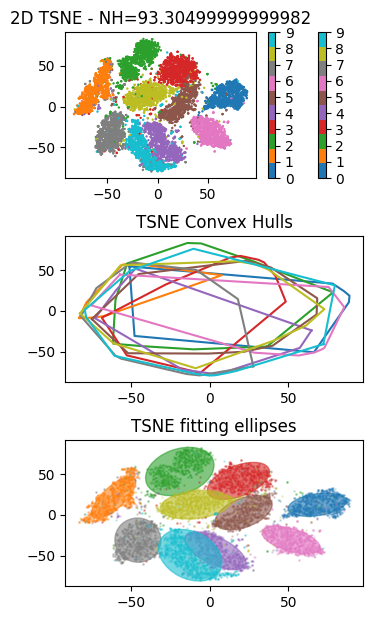

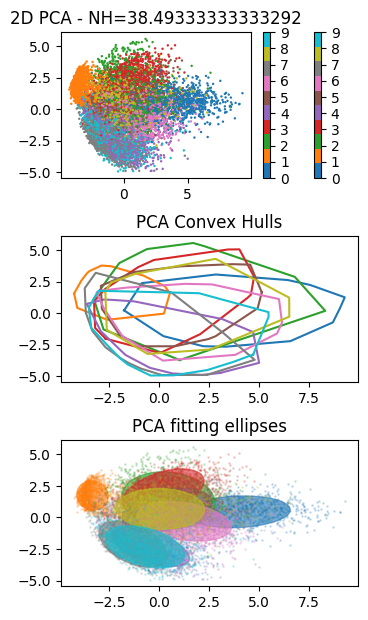

In [ ]:
visualization(x2d_tsne, y_test,convex_hulls, ellipses, 'TSNE',neighboring_hits )
visualization(x2d_pca, y_test,convexHulls_pca, ellipses_pca, 'PCA',neighboring_hit_pca )

### Analyse de la distribution des points et des classes

Les résultats montrent un **chevauchement important des classes** lorsque l’on utilise l’ACP pour projeter les données. Les points de différentes classes se superposent fortement, rendant la séparation visuelle difficile.  

En revanche, la méthode **t-SNE** offre une **meilleure séparation visuelle** des classes, car elle préserve la structure locale des données, contrairement à l’ACP qui maximise seulement la variance globale. Cette supériorité se reflète également dans la métrique **Neighborhood Hit**, qui atteint **93,3 % avec t-SNE** contre seulement **38,5 % avec l’ACP**.  

Cependant, même avec t-SNE, certaines classes restent **relativement proches les unes des autres**, indiquant que la séparation n’est pas parfaite et que certaines frontières de classes restent difficiles à distinguer.  

Enfin, les **enveloppes convexes** ne sont pas idéales pour évaluer la séparabilité, car elles incluent tous les points, y compris les valeurs extrêmes ou aberrantes.


# Exercice 5 : Visualisation des représentations internes des réseaux de neurones

## Loading the model

In [ ]:
from keras.models import model_from_json
def loadModel(savename):
  with open(savename+".json", "r") as json_file:
    model = model_from_json(json_file.read())
  print("JSON Model ",savename,".json loaded ")
  model.load_weights(savename+".weights.h5")
  print("Weights ",savename,".h5 loaded ")
  return model

In [ ]:
model_ = loadModel('MLP')
model.summary()
scores = model.evaluate(X_test, Y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

JSON Model  MLP .json loaded 
Weights  MLP .h5 loaded 


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ fc1 (Dense)                     │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,512 (310.60 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

compile_metrics: 97.66%


In [ ]:
model.pop()
model.pop()
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ fc1 (Dense)                     │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 100)            │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 78,502 (306.65 KB)

 Trainable params: 78,500 (306.64 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

## Making predictions

In [ ]:
predictions = model.predict(X_test)
predictions.shape

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


(10000, 100)

## Dimentionality reduction with PCA and TSNE

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.001s...
[t-SNE] Computed neighbors for 10000 samples in 1.968s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.717983
[t-SNE] Computed conditional probabilities in 0.205s
[t-SNE] Iteration 50: error = 86.2029572, gradient norm = 0.0167827 (50 iterations in 12.011s)
[t-SNE] I

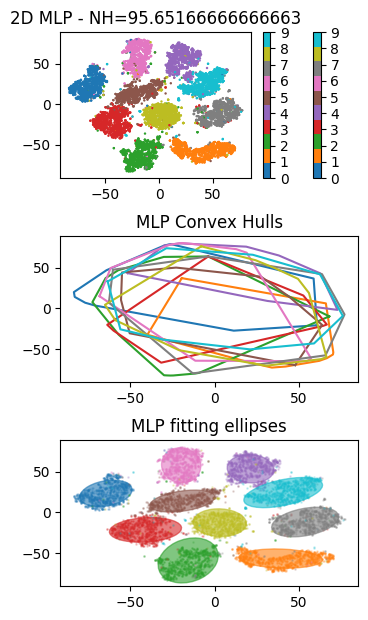

In [ ]:
x2d_tsne = tsne.fit_transform(predictions)
convex_hulls= convexHulls(x2d_tsne, y_test)
ellipses = best_ellipses(x2d_tsne, y_test)
neighboring_hits = neighboring_hit(x2d_tsne, y_test)
visualization(x2d_tsne, y_test,convex_hulls, ellipses, 'MLP',neighboring_hits )

### Visualisation des représentations internes avec t-SNE

En extrayant la couche cachée (vecteur de dimension 100) de chaque image de la base de test et en appliquant la méthode **t-SNE**, on peut visualiser les représentations internes apprises par le réseau.  

**Observations :**  
- Les projections des **caractéristiques profondes** montrent une séparation beaucoup plus nette des classes que les données initiales.  
- Le **Neighborhood Hit (NH)** augmente significativement, indiquant que les points d’une même classe sont plus regroupés dans l’espace des caractéristiques profondes.  
- Comparativement aux **MLP**, les **CNN** produisent des classes mieux compactées, avec des ellipses plus denses et éloignées les unes des autres, ce qui traduit une meilleure représentation des données à la dernière couche.  
- Les **enveloppes convexes** ne montrent pas d’amélioration notable, leur sensibilité aux valeurs aberrantes restant un facteur limitant.  

**Conclusion :**  
Les réseaux de neurones sont capables de résoudre efficacement le problème du **Manifold Untangling**, en transformant l’espace d’entrée pour séparer les classes de manière plus claire dans l’espace des représentations internes.
